# 오늘 학습 내용

- OpenCV 개요
- 환경설정 (라이브러리 설치)
- 이미지를 읽고 출력하기
- 색상 변환 방법
- 이미지 종류 : 칼라, 흑백, 이진이미지
- 동영상을 읽고 출력하기
- 동영상 저장
- 동영상에서 이미지 프레임 저장
- 유튜브 연동 방법
- Flask를 이용해서 Web 카메라 환경 구축

## OpenCV 개요

- C++로 제작되어 있고 래퍼 클래스를 이용해서 파이썬에서 라이브러리처럼 연동
- C++, Java, javascript, Android, Python 등에서 활용 가능
- OpenCV의 결과값은 Python의 Numpy, Matplotlib, Scipy와 직접 연동
- CUDA, OpenCL 등의 분산처리 기능 지원

## 추천 사이트
- 참고 : https://blog.naver.com/samsjang/220498694383
  - https://m.blog.naver.com/samsjang/220498694383
- https://cafe.naver.com/opencv : OpenCV 커뮤니티 카페
- https://opencv.org/ : OpenCV 공식 사이트
  - https://github.com/opencv/opencv : OpenCV github 사이트
  - https://docs.opencv.org/4.x/d9/df8/tutorial_root.html : 튜토리얼
  - https://docs.opencv.org/ : 온라인 문서 (명령어)
- https://www.codeproject.com/Tags/OpenCV : 다양한 OpenCV 코드 제공
- https://learnopencv.com/ : 프로젝트에 활용하기 좋은 다양한 코드 제공
- https://github.com/spmallick/learnopencv/tree/master/ : 파이토치로 된 좋은 예시 코드
- https://meissa.tistory.com/ : OpenCV 고급 응용 예시 코드 (딥러닝 학습 포함)
- http://www.computer-vision-software.com/blog/ : 컴퓨터 비젼 관련 해외 블로그
- https://github.com/LongxingTan/Yolov5 : Yolov5 코드

## 환경설정

In [1]:
# 파이썬용 OpenCV 라이브러리
# 파이썬용 OpenCV 확장라이브러리
!pip install opencv-python opencv-contrib-python

In [2]:
import cv2

## 이미지 읽고 출력하기

In [4]:
import cv2

# imread(파일명, 읽기옵션)
# 읽기옵션 : cv2.IMREAD_COLOR (칼라), cv2.IMREAD_GRAYSCALE (흑백)
img = cv2.imread("./data/bazzi.jpg", cv2.IMREAD_COLOR)

# imshow("타이틀", 이미지객체)
cv2.imshow("bazzi", img)

# waitKey(0) : 사용자가 하나의 키 값을 입력할동안 무한정 대기
cv2.waitKey(0)
# destroyAllWindows() : 열린 창을 닫음
cv2.destroyAllWindows()

## matplotlib을 이용해서 이미지 출력

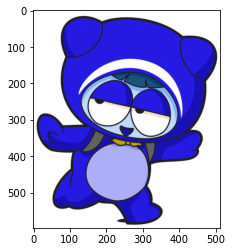

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img)

- OpenCV는 BGR 색상을 사용하고 파이썬 RGB 색상을 사용
  - Red 채널과 Blue 채널이 바뀌어서 출력
  - cvtColor() 함수를 이용해서 색상공간을 변경

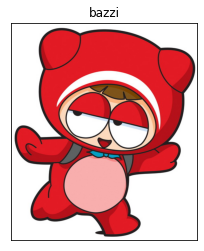

In [9]:
# cvtColor(이미지 객체, 변환옵션)
# cv2.COLOR_BGR2RGB : BGR -> RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 축 값 삭제
plt.xticks([]), plt.yticks([])
# 타이틀 표시
plt.title("bazzi")
plt.imshow(img2)

## 칼라이미지를 흑백/이진 이미지로 변환

- 칼라 이미지 : 채도와 명도에 따라 색상이 변경되는 문제, 3개의 채널 (RGB)를 사용하기 때문에 데이터가 커서 실시간 처리가 어려운 경우도 발생
  - 흑백이미지나 이진이미지로 변환해서 처리
  
- 흑백이미지 변환 방법
  - imread()로 이미지를 읽을 때 흑백이미지로 읽는 방법
  - 칼라이미지로 읽어서 cvtColor()로 흑백이미지로 변환하는 방법
    - 칼라이미지를 출력할 필요가 있는 경우에 사용
    
- 이진이미지 변환 방법
  - threshold() 함수 이용 
    - 한 개의 임계치(기준값)을 수동으로 설정하는 방법
    - 한 개의 임계치를 자동으로 설정하는 방법
  - adaptiveThreshold() 함수 이용 : 여러 개의 임계치를 자동으로 설정하는 방법

### 칼라이미지를 흑백이미지(gray image)로 변환

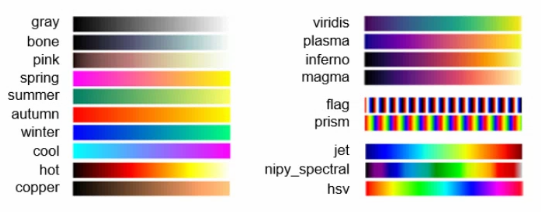

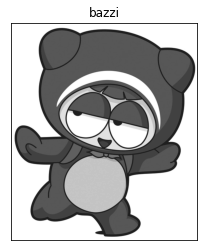

In [11]:
# imread() 함수로 흑백이미지를 읽는 방법
img_gray = cv2.imread("./data/bazzi.jpg", cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.title("bazzi")

# cmap : 칼라맵을 설정 (초기값 : viridis)
plt.imshow(img_gray, cmap="gray")

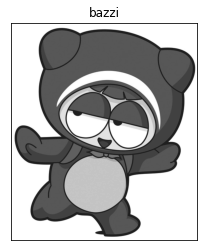

In [12]:
# 칼라이미지로 읽어서 cvtColor() 함수로 흑백이미지로 변환
img_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([]), plt.yticks([])
plt.title("bazzi")
plt.imshow(img_gray2, cmap="gray")

### 흑백이미지를 이진이미지로 변환

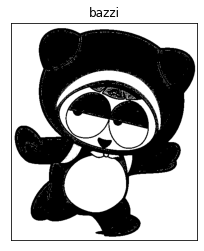

In [20]:
# 임계치를 수동으로 설정하는 방법
# 임계값, 이진이미지 = threshold(흑백이미지, 임계값, 설정값, 옵션)
# 옵션 
#  - cv2.THRESH_BINARY : 임계값보다 크면 설정값으로 그렇지 않으면 0으로 처리
#  - cv2.THRESH_BINARY_INV : 임계값보다 크면 0으로 그렇지 않으면 설정값으로 처리
_, img_bin = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)

plt.xticks([]), plt.yticks([])
plt.title("bazzi")
plt.imshow(img_bin, cmap="gray")

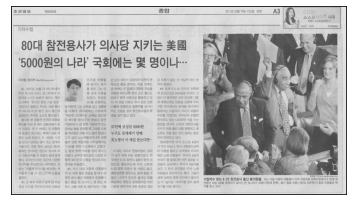

In [22]:
import cv2
import matplotlib.pyplot as plt

img_gray = cv2.imread("./data/news_paper.jpg", cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img_gray, cmap="gray")

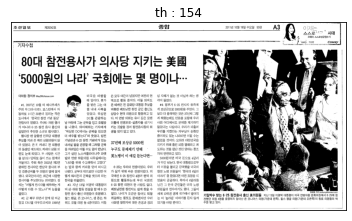

In [24]:
# 자동으로 임계치를 설정해서 이진이미지로 변환 (OSTU 알고리즘)
#  - 임계값을 -1로 설정
#  - 옵션에 cv2.THRESH_OTSU를 추가
th, img_bin = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | 
                           cv2.THRESH_OTSU)

plt.xticks([]), plt.yticks([])
plt.title("th : %d"%th)
plt.imshow(img_bin, cmap="gray")

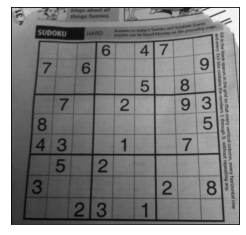

In [25]:
# 빛 반사가 다른 영역을 가진 이미지를 이진이미지로 변환 (OTSU)
import cv2
import matplotlib.pyplot as plt

img_gray = cv2.imread("./data/sudoku.png", cv2.IMREAD_GRAYSCALE)

plt.xticks([]), plt.yticks([])
plt.imshow(img_gray, cmap="gray")

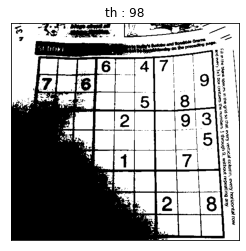

In [26]:
th, img_bin = cv2.threshold(img_gray, -1, 255, cv2.THRESH_BINARY | 
                           cv2.THRESH_OTSU)

plt.xticks([]), plt.yticks([])
plt.title("th : %d"%th)
plt.imshow(img_bin, cmap="gray")

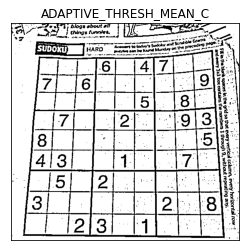

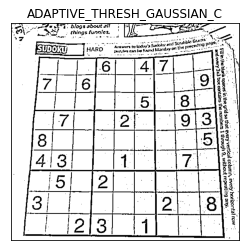

In [28]:
# 하나의 임계치로 이진이미지를 변환하면 명도가 다른 경우 잘못된 변환
#   - 이미지의 영역별로 다른 임계치를 설정 -> 적응형 threshold

# adaptiveThreshold(흑백이미지, 255, 옵션1, 옵션2, 블럭크기, 적응상수)
#   - 옵션1 : cv2.ADAPTIVE_THRESH_MEAN_C, cv2.ADAPTIVE_THRESH_GAUSSIAN_C
#   - 블럭크기 : 얼마크기의 영역마다 임계치를 설정한 것인지
#   - 적응상수 : 결과에 가감할 값

# 선명한데 잡음이 많음
img_bin2 = cv2.adaptiveThreshold(img_gray, 255, 
                                cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,
                                9, 5)
# 잡음은 적은데 약간 흐릿함
img_bin3 = cv2.adaptiveThreshold(img_gray, 255, 
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY,
                                9, 5)

plt.xticks([]), plt.yticks([])
plt.title("ADAPTIVE_THRESH_MEAN_C")
plt.imshow(img_bin2, cmap="gray")
plt.show()

plt.xticks([]), plt.yticks([])
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C")
plt.imshow(img_bin3, cmap="gray")
plt.show()

## 동영상 읽고 출력하기

In [30]:
import cv2

# 카메라, 동영상, URL, IP 등으로부터 영상을 연결
# 카메라인 경우 (카메라 번호 - com 포트 번호)
cap = cv2.VideoCapture(0)

# 동영상인 경우
#cap = cv2.VideoCapture("./data/video.mp4")

# URL 경우
#cap = cv2.VideoCapture("URL")

# 웹 카메라 (IP가 부여된 원격 카메라)인 경우
#cap = cv2.VideoCapture("IP/카메라번호")

while True :
    # 캡처된 동영상으로부터 이미지프레임을 한 장씩 읽는다
    # ret : 읽기 성공인 경우 True를 반환하고 frame에 읽은 이미지를 저장
    ret, frame = cap.read()
    
    # 이미지를 못 읽었거나 다 읽은 경우에 대한 처리
    if not ret :
        cap.release()  
        cv2.destroyAllWindows()
        break
    
    # 읽은 이미지를 출력
    cv2.imshow("video", frame)
    
    # 일반적으로 동영상은 1초에 30장 이미지로 구성
    # 시간은 1/1000초 단위이므로 1초에 30장 이미지를 출력하려면 0.033초의 딜레이
    # key는 사용자가 누른 키 값을 아스키 코드로 반환
    key = cv2.waitKey(33)
    
    if key == 49 : # 숫자 1을 누르면
        cap.release()   # 비디오 해제
        cv2.destroyAllWindows()
        break

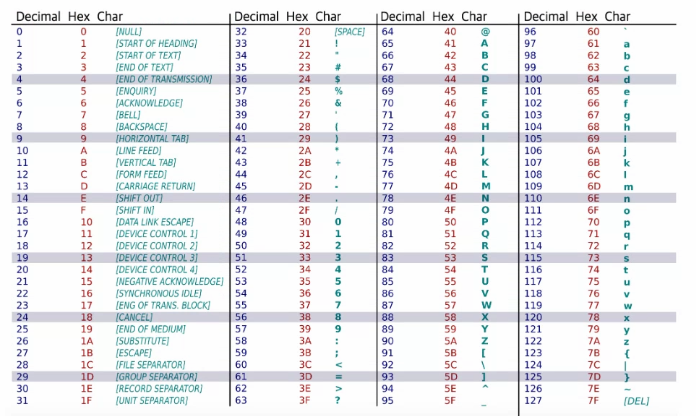

## 동영상 녹화하기

In [6]:
import cv2

try :
    # 영상이나 카메라를 캡처할 수 없는 상황을 고려
    cap = cv2.VideoCapture("./data/video.mp4")
    print("동영상 캡처 성공")
except :
    print("동영상 캡처 실패")
    
# 녹화 설정 (속도, 크기, 코덱)
# 속도 (초당 프레임 이미지 수)
fps = 30.0

# 크기 (캡처된 동영상의 크기를 그대로 사용)
w = int(cap.get(3))     # 3 : 가로 크기
h = int(cap.get(4))     # 4 : 세로 크기

# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX")   # avi 파일로 저장

# 저장할 파일을 설정 
# VideoWriter(파일명, 코덱, 속도, 크기)
out = cv2.VideoWriter("./data/cctv01.avi", codec, fps, (w, h))

# 녹화 여부 설정 (처음에는 녹화를 안함)
record = False

while True :
    ret, frame = cap.read()
    
    if not ret :
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("cctv", frame)
    
    if record :
        # 녹화
        out.write(frame)
    
    key = cv2.waitKey(33)
    
    if key == 49 :
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break
        
    # 녹화 조건 (숫자 2를 누르면 녹화 시작)     
    if key == 50 : 
        record = True

동영상 캡처 성공


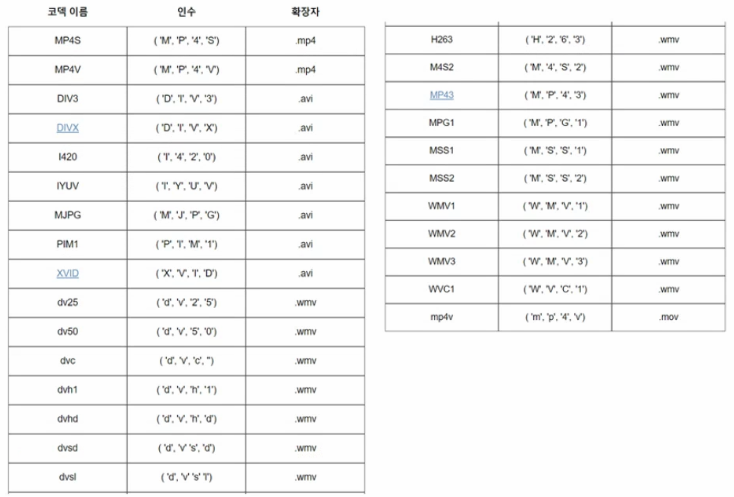

## 동영상에서 프레임 이미지를 한 장씩만 저장

In [7]:
import cv2

try :
    cap = cv2.VideoCapture("./data/video.mp4")
    print("동영상 캡처 성공")
except :
    print("동영상 캡처 실패")
    
# 파일이름에 번호를 부여
co = 0
    
while True :
    ret, frame = cap.read()
    
    if not ret :
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("cctv", frame)
    
    key = cv2.waitKey(33)
    
    if key == 49 :
        cap.release()
        cv2.destroyAllWindows()
        break
        
    if key == 50 : # 숫자 2를 누를때마다 현재 프레임을 저장
        co = co + 1
        print("./data/frame{}.png".format(co), " 파일을 저장")
        
        # imwrite(파일명, 저장할 이미지, params=파일타입과압축옵션)
        # IMWRITE_PNG_COMPRESSION : png 파일로 압축저장
        # 0 : 압축률 0% (0-9까지 사용)
        cv2.imwrite("./data/frame{}.png".format(co),
                    frame,
                    params=[cv2.IMWRITE_PNG_COMPRESSION, 0])

동영상 캡처 성공
./data/frame1.png  파일을 저장
./data/frame2.png  파일을 저장
./data/frame3.png  파일을 저장
./data/frame4.png  파일을 저장


## 유튜브 영상 연동하기

In [8]:
# 유튜브의 영상정보를 가져오는 라이브러리
!pip install pafy

In [9]:
# 유튜브의 영상을 다운로드하는 라이브러리 (음성은 제외됨)
!pip install youtube-dl

In [15]:
import cv2
import pafy

# 유튜브의 영상의 정보를 가져온다 
info = pafy.new("https://www.youtube.com/watch?v=XnPHJTEng_I")

# 정보 확인
print("제목 : ", info.title)
print("평점 : ", info.rating)
print("저작권자 : ", info.author)
print("영상길이 : ", info.duration)

# 영상포맷과 URL
url = info.getbest(preftype="mp4")

print(url.url)

제목 :  스마트인재개발원
평점 :  None
저작권자 :  스마트인재개발원 인쌤TV
영상길이 :  00:00:33
https://rr1---sn-3u-3fw6.googlevideo.com/videoplayback?expire=1649856219&ei=e3pWYv6iHrCNs8IPnJ6pmAs&ip=211.107.188.217&id=o-AAkf99L1xmDzDOE15MDx5DbH7teJCpPbca8zKCaVwr-b&itag=22&source=youtube&requiressl=yes&mh=iV&mm=31%2C29&mn=sn-3u-3fw6%2Csn-3u-bh2zs&ms=au%2Crdu&mv=m&mvi=1&pl=19&initcwndbps=1000000&spc=4ocVC_3hVEFHDuiVr7DWyRTrjXei&vprv=1&mime=video%2Fmp4&ns=KSACBaZbchbz8igpjkaVbuEG&ratebypass=yes&dur=32.740&lmt=1555570710115511&mt=1649834222&fvip=3&fexp=24001373%2C24007246&c=WEB&txp=2216222&n=FDd5m0AMBoLsSdOg&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cspc%2Cvprv%2Cmime%2Cns%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRAIgUfNuq1anjj5rPMnXV3JS8TazyePWRYypVC58Y2rxlcUCID1onSkhyuVGO2F-ZYeNjlG6mMygxL1YZcr2lq8WybMD&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRQIgP0EZ--NS2uKkWH0Vz3FGWVwUFh13d-ygtjibEOryuIkCIQCSZSrz2HZ-lSwhGvqViAtGLiD62sonKGYMoJ8qt-J_Fw%3D%3D


In [16]:
import cv2

cap = cv2.VideoCapture(url.url)

# 영상 파일이 열였으면
while cap.isOpened() :
    ret, frame = cap.read()
    
    if not ret :
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("youtube", frame)    
    
    key = cv2.waitKey(33)    
    
    if key == 49 :
        cap.release()
        cv2.destroyAllWindows()
        break

## Flask를 이용해서 웹 카메라 만들기

- Flask 프레임워크 : 파이썬으로 이용해서 웹서버를 구축하는 작업을 지원

In [17]:
!pip install flask

### 플라스크 서버 실행하기

In [18]:
from flask import Flask

# 플라스크 객체 생성
app = Flask(__name__)

# 메인 접근 경로 설정 (브라우저에서 기본 IP를 입력하는 실행되는 함수)
@app.route("/")
def hello() :
    return "<h1>안녕하세요</h1>"

# 메인 객체 선언
if __name__ == "__main__" :
    # 서버 실행
    app.run(host="127.0.0.1", port=9000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Apr/2022 16:38:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Apr/2022 16:38:34] "GET /favicon.ico HTTP/1.1" 404 -


## URL로 함수 접근하기

In [19]:
from flask import Flask

app = Flask(__name__)

@app.route("/test")
def hello() :
    return "<h1>안녕하세요</h1>"

# 메인 객체 선언
if __name__ == "__main__" :
    # 서버 실행
    app.run(host="127.0.0.1", port=9000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Apr/2022 16:43:38] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [13/Apr/2022 16:44:05] "GET /test HTTP/1.1" 200 -


### 플라스크 서버로 값 넘기기

In [20]:
from flask import Flask

app = Flask(__name__)

@app.route("/test/<val>")
def hello(val) :
    return "<h1>안녕하세요 ==> " + val + "</h1>"

# 메인 객체 선언
if __name__ == "__main__" :
    # 서버 실행
    app.run(host="127.0.0.1", port=9000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Apr/2022 16:47:43] "GET /test/100 HTTP/1.1" 200 -


### HTML 문서를 반환하기

- HTML 문서 작성
- templates 폴더를 만들어서 HTML를 저장

In [22]:
# render_template : HTML 문서를 반환해주는 기능
from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def hello() :
    return render_template("test.html")

# 메인 객체 선언
if __name__ == "__main__" :
    # 서버 실행
    app.run(host="127.0.0.1", port=9000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [13/Apr/2022 17:00:37] "GET / HTTP/1.1" 200 -


## 웹 카메라 만들기 (스트리밍 서버 구축)

In [32]:
# 이미지 프레임을 획득하는 함수
import cv2

# cap = cv2.VideoCapture("./data/video.mp4")
cap = cv2.VideoCapture(0)

def getFrame() :
    while True :
        ret, frame = cap.read()
        
        cv2.waitKey(33)
    
        if not ret :
            # 스트리밍 서비스이므로 오류 생기면 다음으로 넘김
            continue
        else :
            # 전송할 이미지를 획득 (바이트 단위로 변환)
            ret, buffer = cv2.imencode(".jpg", frame)
            frame = buffer.tobytes()
        
            # b : 바이트 단위
            # --frame : 프레임 단위로 전송
            # image/jpeg : 이미지 타입이고 JPEG로 압축된 파일
            # yield() : 함수의 중간 결과를 계속 전송
            # return() : 함수의 최종 결과를 전송
            yield (b'--frame\r\n'
                   b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')  

In [ ]:
# 클라이언트로 보낼 HTML 문서를 작성 (영상을 출력 기능)
# index.html
# {{ url_for('video_feed') }} : video_feed라는 URL로 호출
"""
<html>
<body>
<div class="container">
    <div class="row">
        <div class="col-lg-8  offset-lg-2">
            <h3 class="mt-5">Live Streaming</h3>
            <img src="{{ url_for('video_feed') }}" width="50%">
        </div>
    </div>
</div>
</body>
</html>
"""

In [ ]:
# Response : 응답 객체
# stream_with_context : 스트리밍 데이터를 전송하는 기능
from flask import Flask, render_template, Response

app = Flask(__name__)

@app.route("/")
def index() :
    return render_template("index.html")
    
@app.route("/video_feed")
def video_feed() :    
    return Response(getFrame(), 
                    mimetype="multipart/x-mixed-replace; boundary=frame")

if __name__ == "__main__" :
    app.run(host="127.0.0.1", port=9000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:9000/ (Press CTRL+C to quit)
